# CTA 1.0

In [1]:
import pandas as pd
import numpy as np

from tinycta.port import build_portfolio

In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True).ffill()

In [3]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=100).mean()
    f = price.ewm(com=fast, min_periods=100).mean()
    return np.sign(f-s) 

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [11]:
portfolio = build_portfolio(prices=prices, cashposition=
                            1e6*prices.apply(f, fast=fast.value, slow=slow.value),
                            aum=1e7)

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)


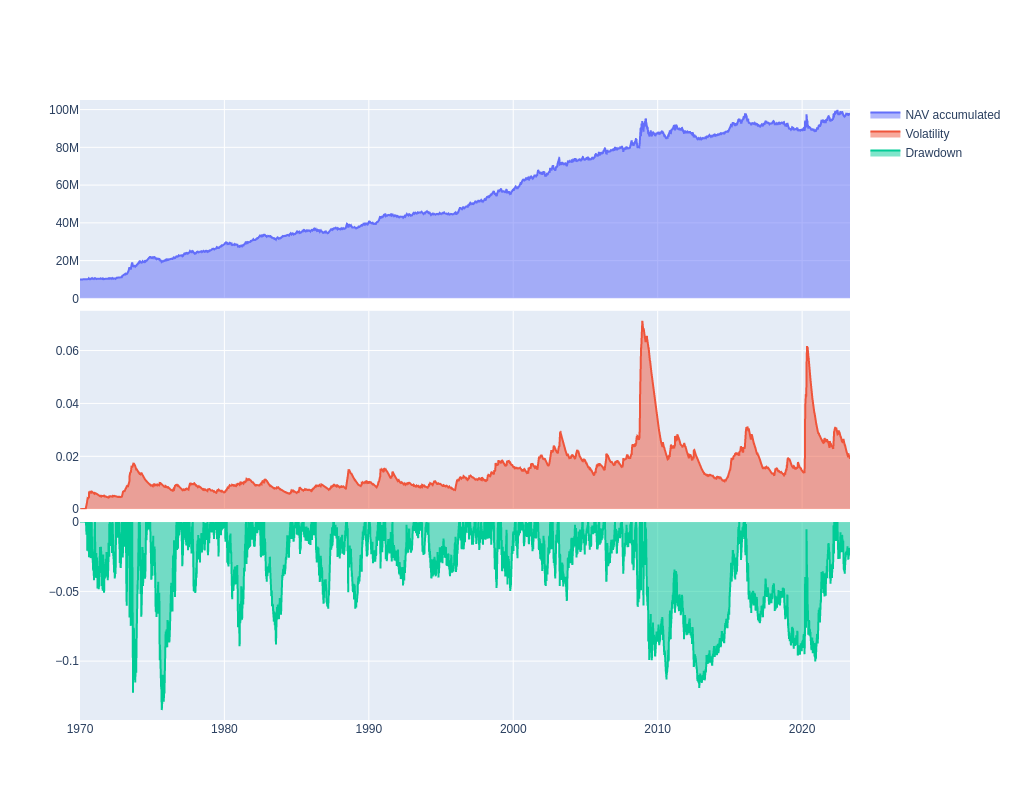

In [12]:
portfolio.plot()

In [13]:
portfolio.metrics()

{'Sharpe': 0.5591222120269528,
 'Kurtosis': 33.42360510480753,
 'Skewness': 0.6901177226366474,
 'Annualized Volatility (%)': 28.492653416587896,
 'Annualized Return (%)': 15.930875404799936}